# Flights Data Analysis - Udacity Nanodegree Project
## by Maitri Banga

## Investigation Overview

> To provide insights regarding delayed flights

## Dataset Overview

> This flight data set has been taken from stat-computing.org, It consists of flight data of the year 2008. It consists of various columns related to delay and cancellation of flights. The dataset has been included in the project submission. Name of datset file is DelayedFlights.csv


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flights_data = pd.read_csv('Flights.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Flight Delays by Month

> Here we will showcase the the month wise flight delays. We can see from the chart that most of the flight delays occur in December

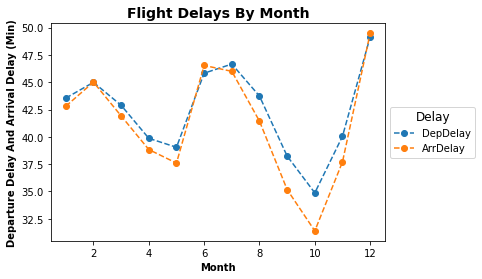

In [3]:
#delays by month (polished)
flights_data.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line(linestyle='--', marker='o');
plt.title('Flight Delays By Month'.title(),
               fontsize = 14, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Delay", title_fontsize = 12)
plt.xlabel('Month'.title(),fontsize = 10, weight = "bold")
plt.ylabel('Departure Delay and Arrival Delay (min)'.title(),fontsize = 10, weight = "bold")
plt.show()

## Flight Delays by Day Of Week

> Here we will showcase the the day of week wise flight delays. We can see from the chart that most of the flight delays occur on 7th day of the week i.e. Sunday

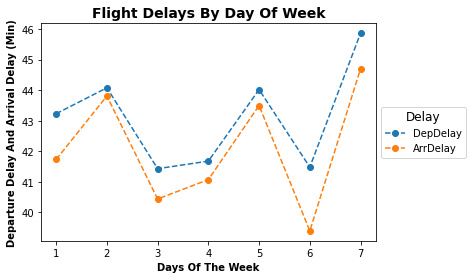

In [4]:
#delays by days of week (polished)
flights_data.groupby('DayOfWeek').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line(linestyle='--', marker='o')
plt.title('Flight Delays By Day Of Week'.title(),
               fontsize = 14, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Delay", title_fontsize = 12)
plt.xlabel('Days of the Week'.title(),fontsize = 10, weight = "bold")
plt.ylabel('Departure Delay and Arrival Delay (min)'.title(),fontsize = 10, weight = "bold")
plt.show()

## Occurence of Delay Types

> We see that the Late Aircraft Delays occur the most and Security Delays occur the least

In [5]:
# The proportion where each type of delay occurs
delay_car = flights_data[(~flights_data.CarrierDelay.isnull()) & (flights_data.CarrierDelay!=0)].shape[0] / flights_data.shape[0]
delay_weather = flights_data[(~flights_data.WeatherDelay.isnull()) & (flights_data.WeatherDelay!=0)].shape[0] / flights_data.shape[0]
delay_nas = flights_data[(~flights_data.NASDelay.isnull()) & (flights_data.NASDelay!=0)].shape[0] / flights_data.shape[0]
delay_sec = flights_data[(~flights_data.SecurityDelay.isnull()) & (flights_data.SecurityDelay!=0)].shape[0] / flights_data.shape[0]
delay_late = flights_data[(~flights_data.LateAircraftDelay.isnull()) & (flights_data.LateAircraftDelay!=0)].shape[0] / flights_data.shape[0]

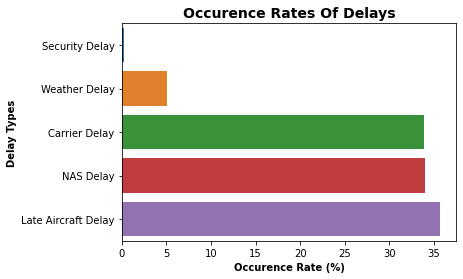

In [6]:
#polished bar chart
delays = pd.Series([delay_car,delay_weather,delay_nas,delay_sec,delay_late], index=["Carrier Delay","Weather Delay","NAS Delay","Security Delay","Late Aircraft Delay"]).sort_values(ascending=True)

sb.barplot(delays*100,delays.index,orient="h");
plt.title('Occurence Rates of Delays'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Occurence Rate (%)'.title(),fontsize = 10, weight = "bold")
plt.ylabel('Delay Types'.title(),fontsize = 10, weight = "bold")
plt.show()

# Distribution of Delays according to Departure Delay
> Longer the departure delay, longer the carrier and weather delay.

In [7]:
sub_set = pd.DataFrame()
delay_types = ["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay","SecurityDelay"]

for type in delay_types:
    sub = pd.DataFrame()
    sub["time"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())][type]
    sub["DepDelay"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())]["DepDelay"]
    sub["ArrDelay"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())]["ArrDelay"]
    sub["Distance"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())]["Distance"]
    sub["type"] = type
    sub_set = sub_set.append(sub)

#relationship between departure delays and all delays
bin_edges = np.arange(0,2000,400)
sub_set["dep_delay"] = pd.cut(sub_set.DepDelay, bin_edges, right=False, include_lowest=True) 

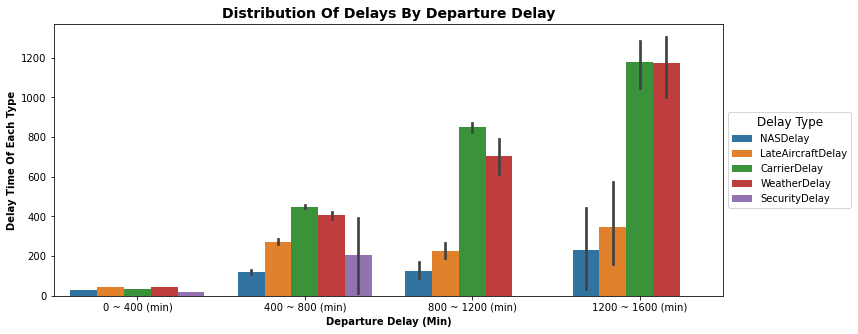

In [9]:
plt.figure(figsize=[12,5])
sb.barplot(data=sub_set, hue="type", y="time", x="dep_delay", dodge=0.8)

plt.title('Distribution of Delays by Departure Delay'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Departure Delay (min)'.title(),fontsize = 10, weight = "bold")
plt.ylabel('Delay Time of Each Type'.title(),fontsize = 10, weight = "bold")
plt.xticks([0,1,2,3],["0 ~ 400 (min)","400 ~ 800 (min)", "800 ~ 1200 (min)","1200 ~ 1600 (min)"]);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Delay Type", title_fontsize = 12)
plt.show()

In [ ]:
!jupyter nbconvert slide_deck_flights.ipynb --to slides --post serve --template output_toggle